<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_hierarchical_clustering_PCA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram,linkage,fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = pd.read_csv('/content/iris_processed.csv')

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
iris.duplicated().sum()

np.int64(3)

In [ ]:
iris.drop_duplicates(inplace=True)

In [ ]:
iris.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in iris.select_dtypes(include='object'):
  iris[i] = le.fit_transform(iris[i])

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
for i in iris.columns:
  iris[i]=ss.fit_transform(iris[[i]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris)
X_pca

array([[-2.60695042,  0.48020002],
       [-2.45240095, -0.67068503],
       [-2.6941533 , -0.33985309],
       [-2.63781593, -0.59455551],
       [-2.71337849,  0.64634519],
       [-2.43670857,  1.48781086],
       [-2.75833438,  0.04888057],
       [-2.57950925,  0.22403919],
       [-2.66962222, -1.11125236],
       [-2.54182856, -0.46659231],
       [-2.52120257,  1.04263389],
       [-2.65849615,  0.13402354],
       [-2.57217981, -0.72566994],
       [-2.92857622, -0.95873027],
       [-2.54958452,  1.85685339],
       [-2.5951089 ,  2.68151613],
       [-2.55229341,  1.48197725],
       [-2.54111311,  0.4894479 ],
       [-2.28823469,  1.40389186],
       [-2.66967645,  1.1265529 ],
       [-2.30595061,  0.4099041 ],
       [-2.55135263,  0.92391858],
       [-3.04472955,  0.45756348],
       [-2.21777684,  0.08855446],
       [-2.57180753,  0.13839875],
       [-2.34066698, -0.6220312 ],
       [-2.41893843,  0.24399336],
       [-2.52411265,  0.52739544],
       [-2.50052235,

In [ ]:
Z = linkage(X_pca,method='ward')

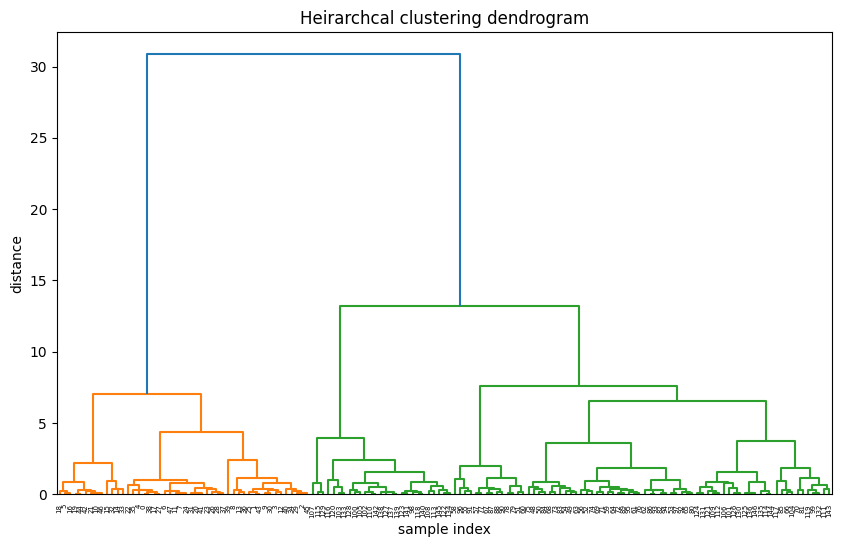

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.title('Heirarchcal clustering dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

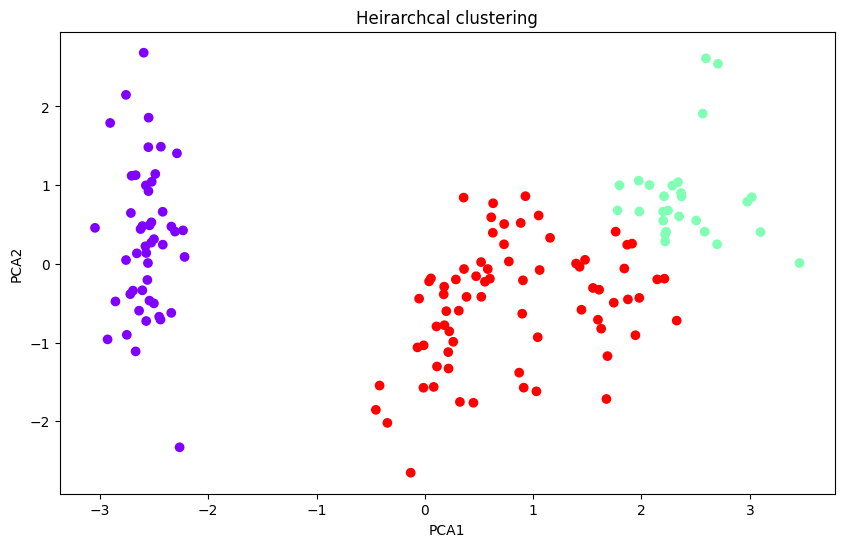

In [ ]:
clusters = fcluster(Z,t=3,criterion='maxclust')
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters,cmap='rainbow')
plt.title('Heirarchcal clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
